# 5 types of plots that will help you with time series analysis

## Setup

In [1]:
# general 
import pandas as pd 
import numpy as np 
from datetime import datetime

# stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

# plotting
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

In [2]:
%config InlineBackend.figure_format = 'retina'

## Loading data

In [3]:
flights = sns.load_dataset("flights")
flights['report_date'] = flights.apply(lambda x: datetime.strptime(f"{x['year']}-{x['month']}", '%Y-%b').date(), axis=1)
flights.head()

,year,month,passengers,report_date
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


## Examples of plots used for time series analysis

### Time plot

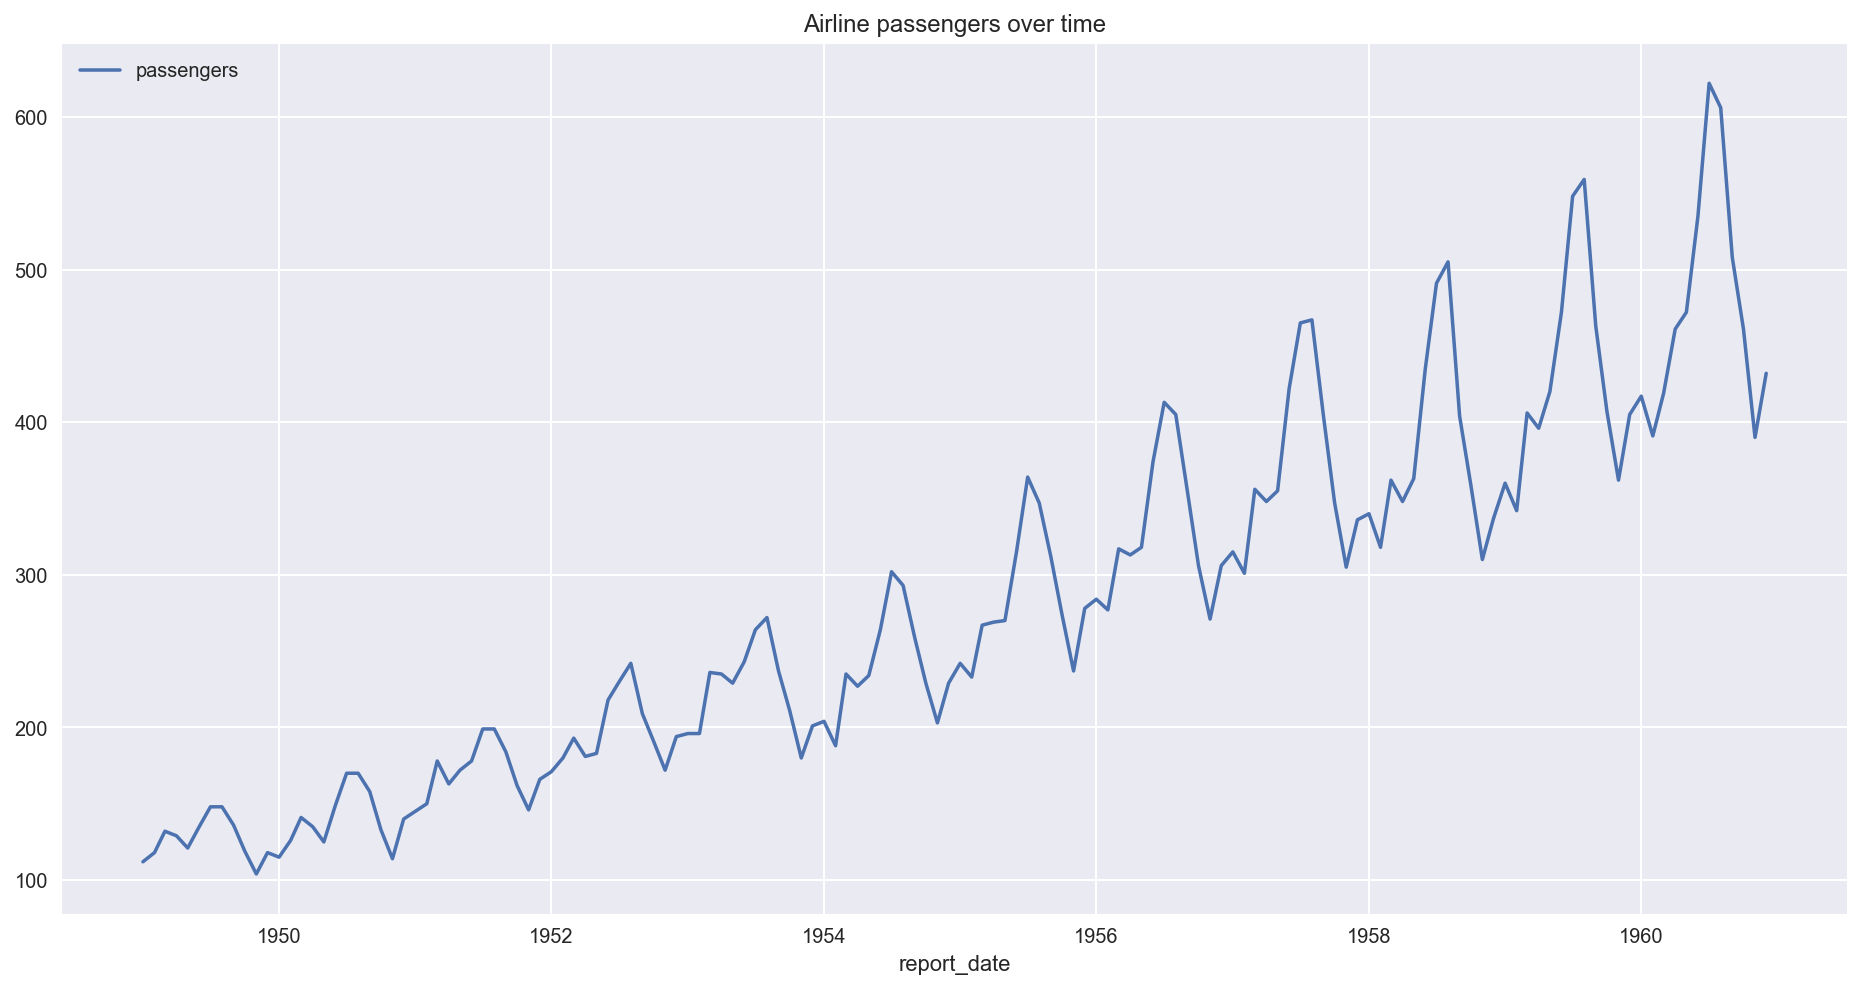

In [4]:
flights.plot(x='report_date', 
             y='passengers', 
             title='Airline passengers over time');

In [5]:
# temporarily change to plotly backend
pd.options.plotting.backend = 'plotly'
flights.plot(x='report_date', 
             y='passengers', 
             title='Airline passengers over time')

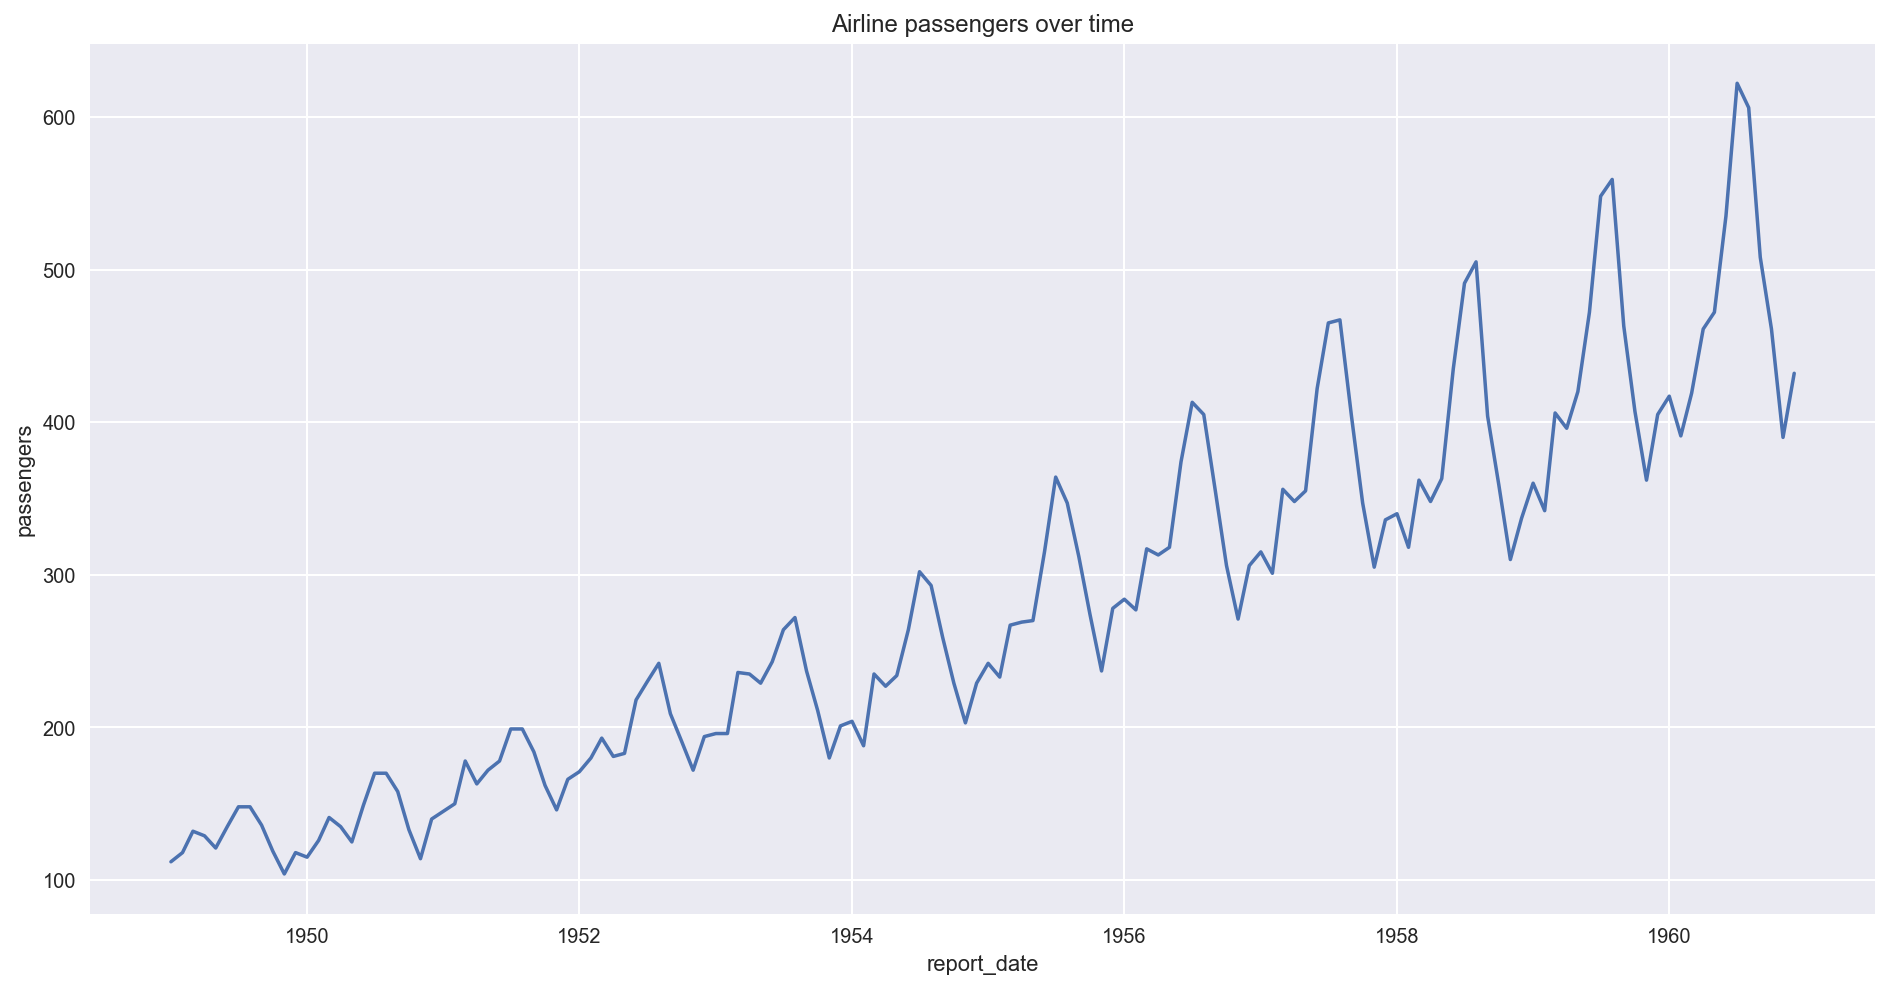

In [6]:
sns.lineplot(data=flights, 
             x='report_date', 
             y='passengers').set_title('Airline passengers over time');

### Seasonal plot

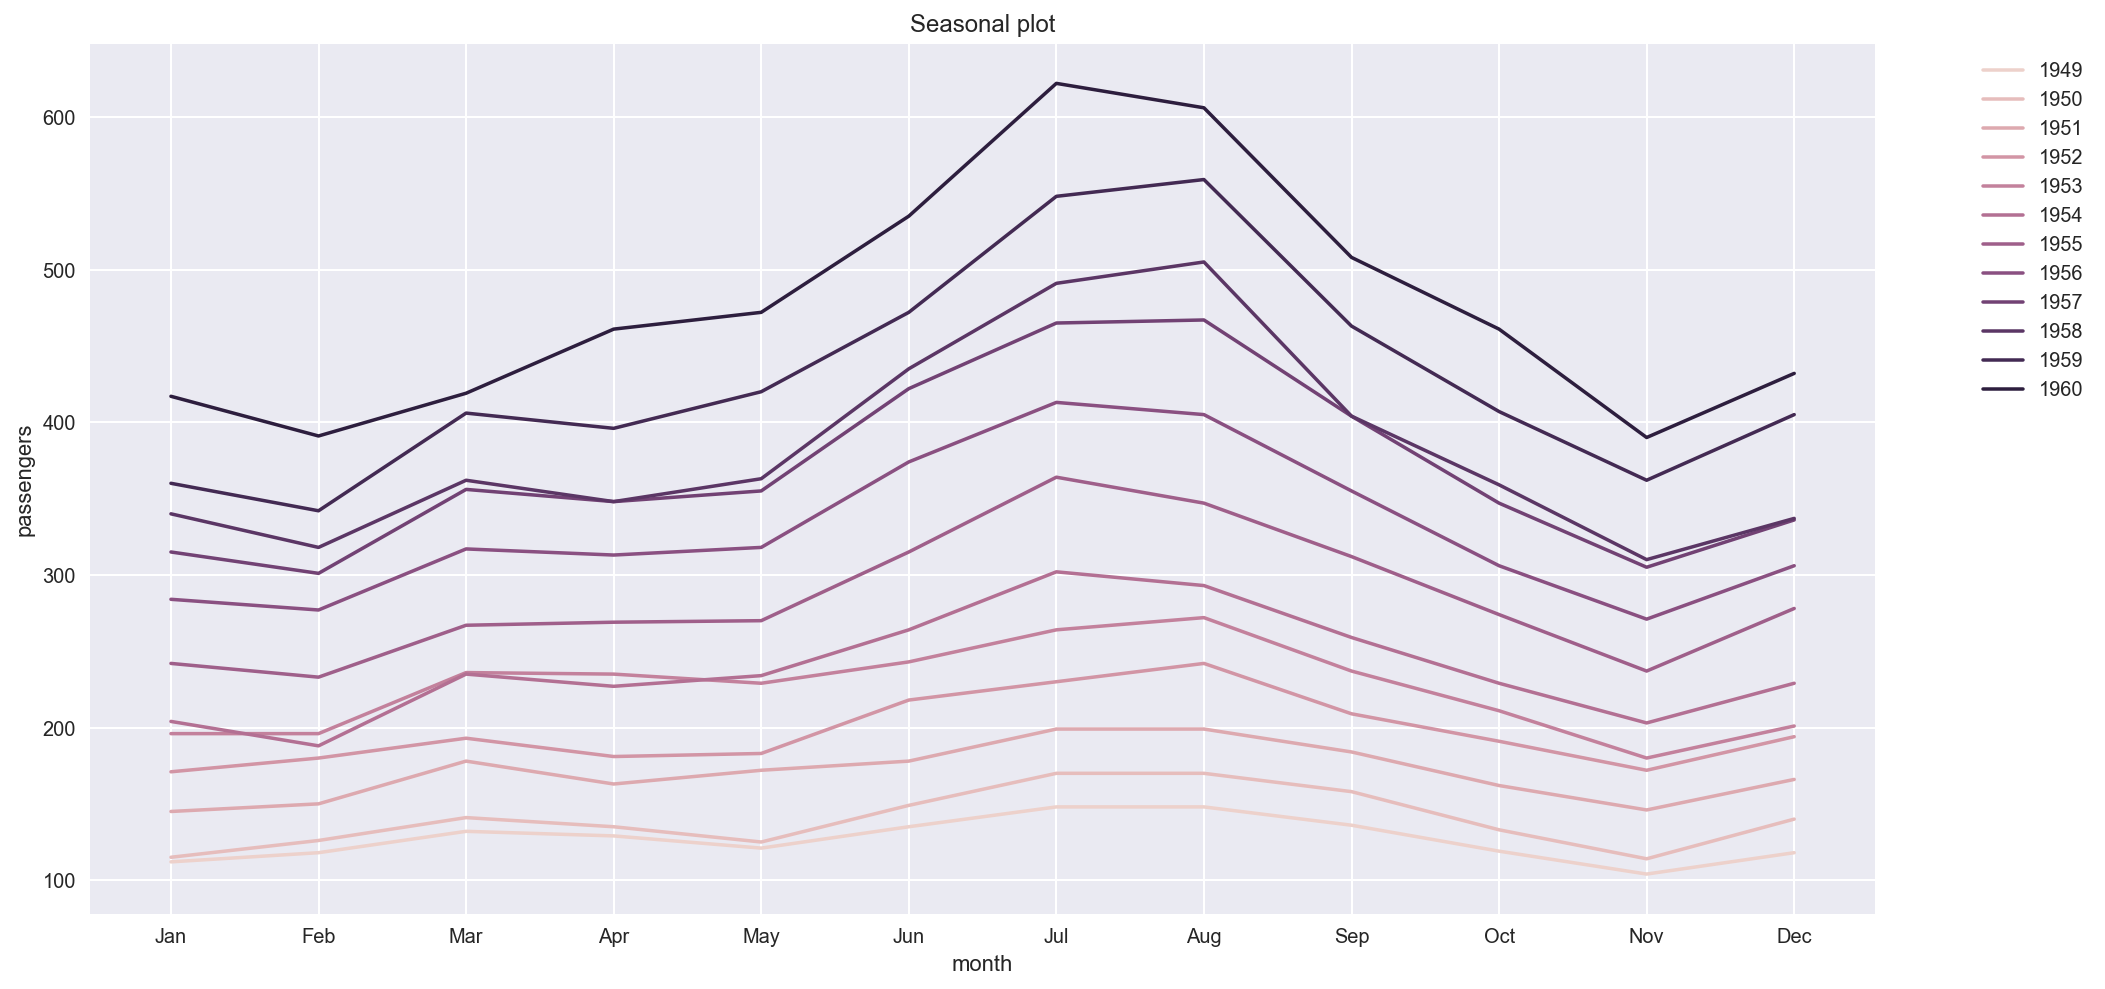

In [7]:
sns.lineplot(data=flights, 
             x='month', 
             y='passengers', 
             hue='year', 
             legend='full')

# add title
plt.title('Seasonal plot')

# move the legend outside of the main figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

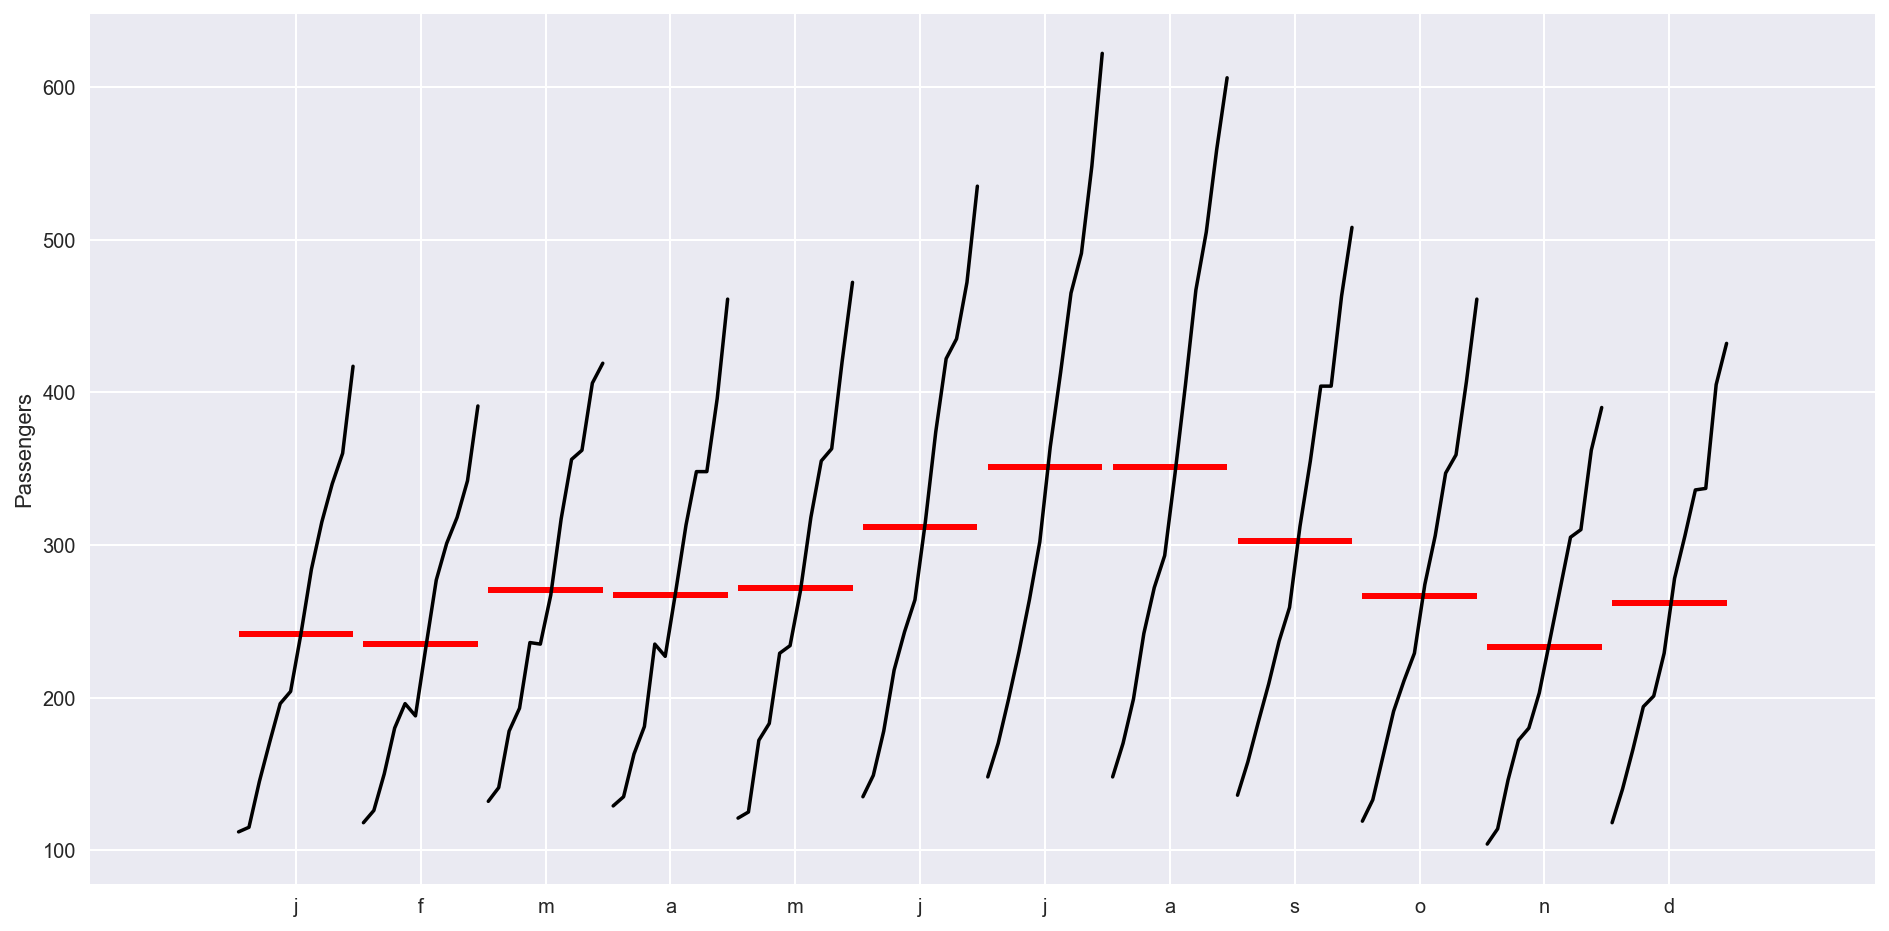

In [8]:
flights = flights.set_index("report_date")
flights.index = pd.DatetimeIndex(flights.index, freq='MS')
month_plot(flights["passengers"], ylabel='Passengers');

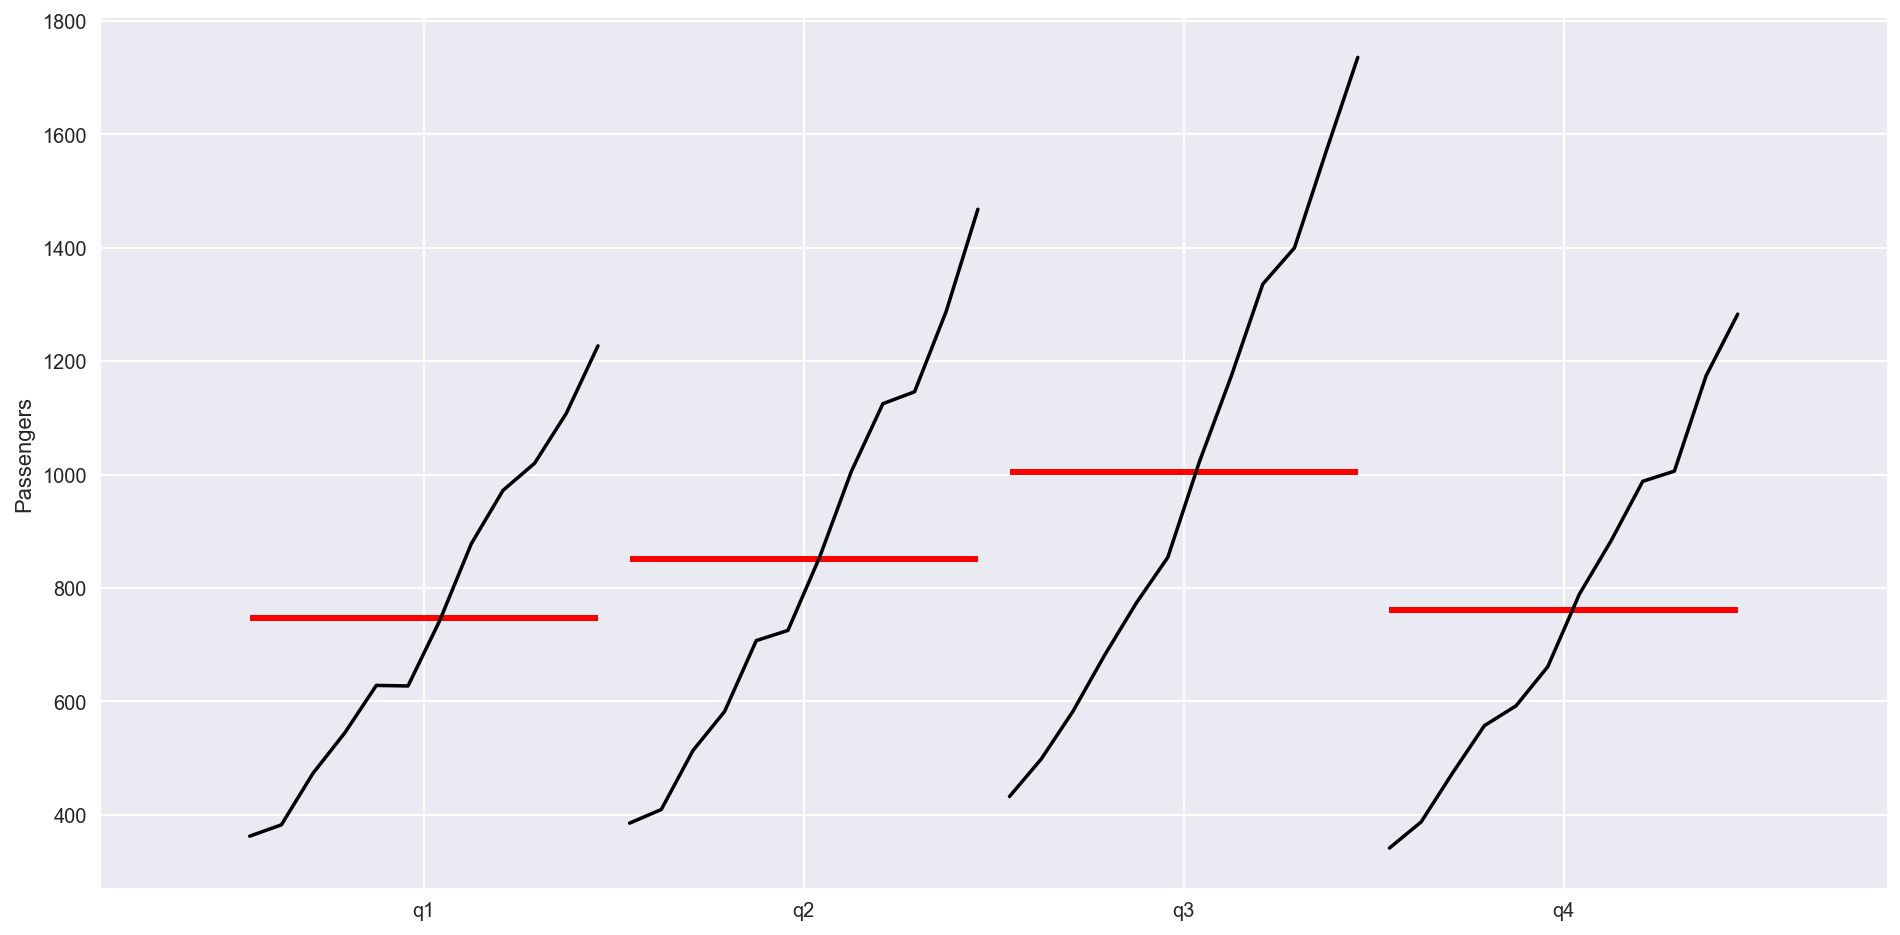

In [9]:
quarter_plot(flights["passengers"].resample('Q').sum(), ylabel='Passengers');

### Polar seasonal plot

In [10]:
fig = px.line_polar(flights, r='passengers', theta='month', 
                    color='year', line_close=True, 
                    title='Polar seasonal plot',
                    width=600, height=500)
fig.show()

### Time series decomposition plot

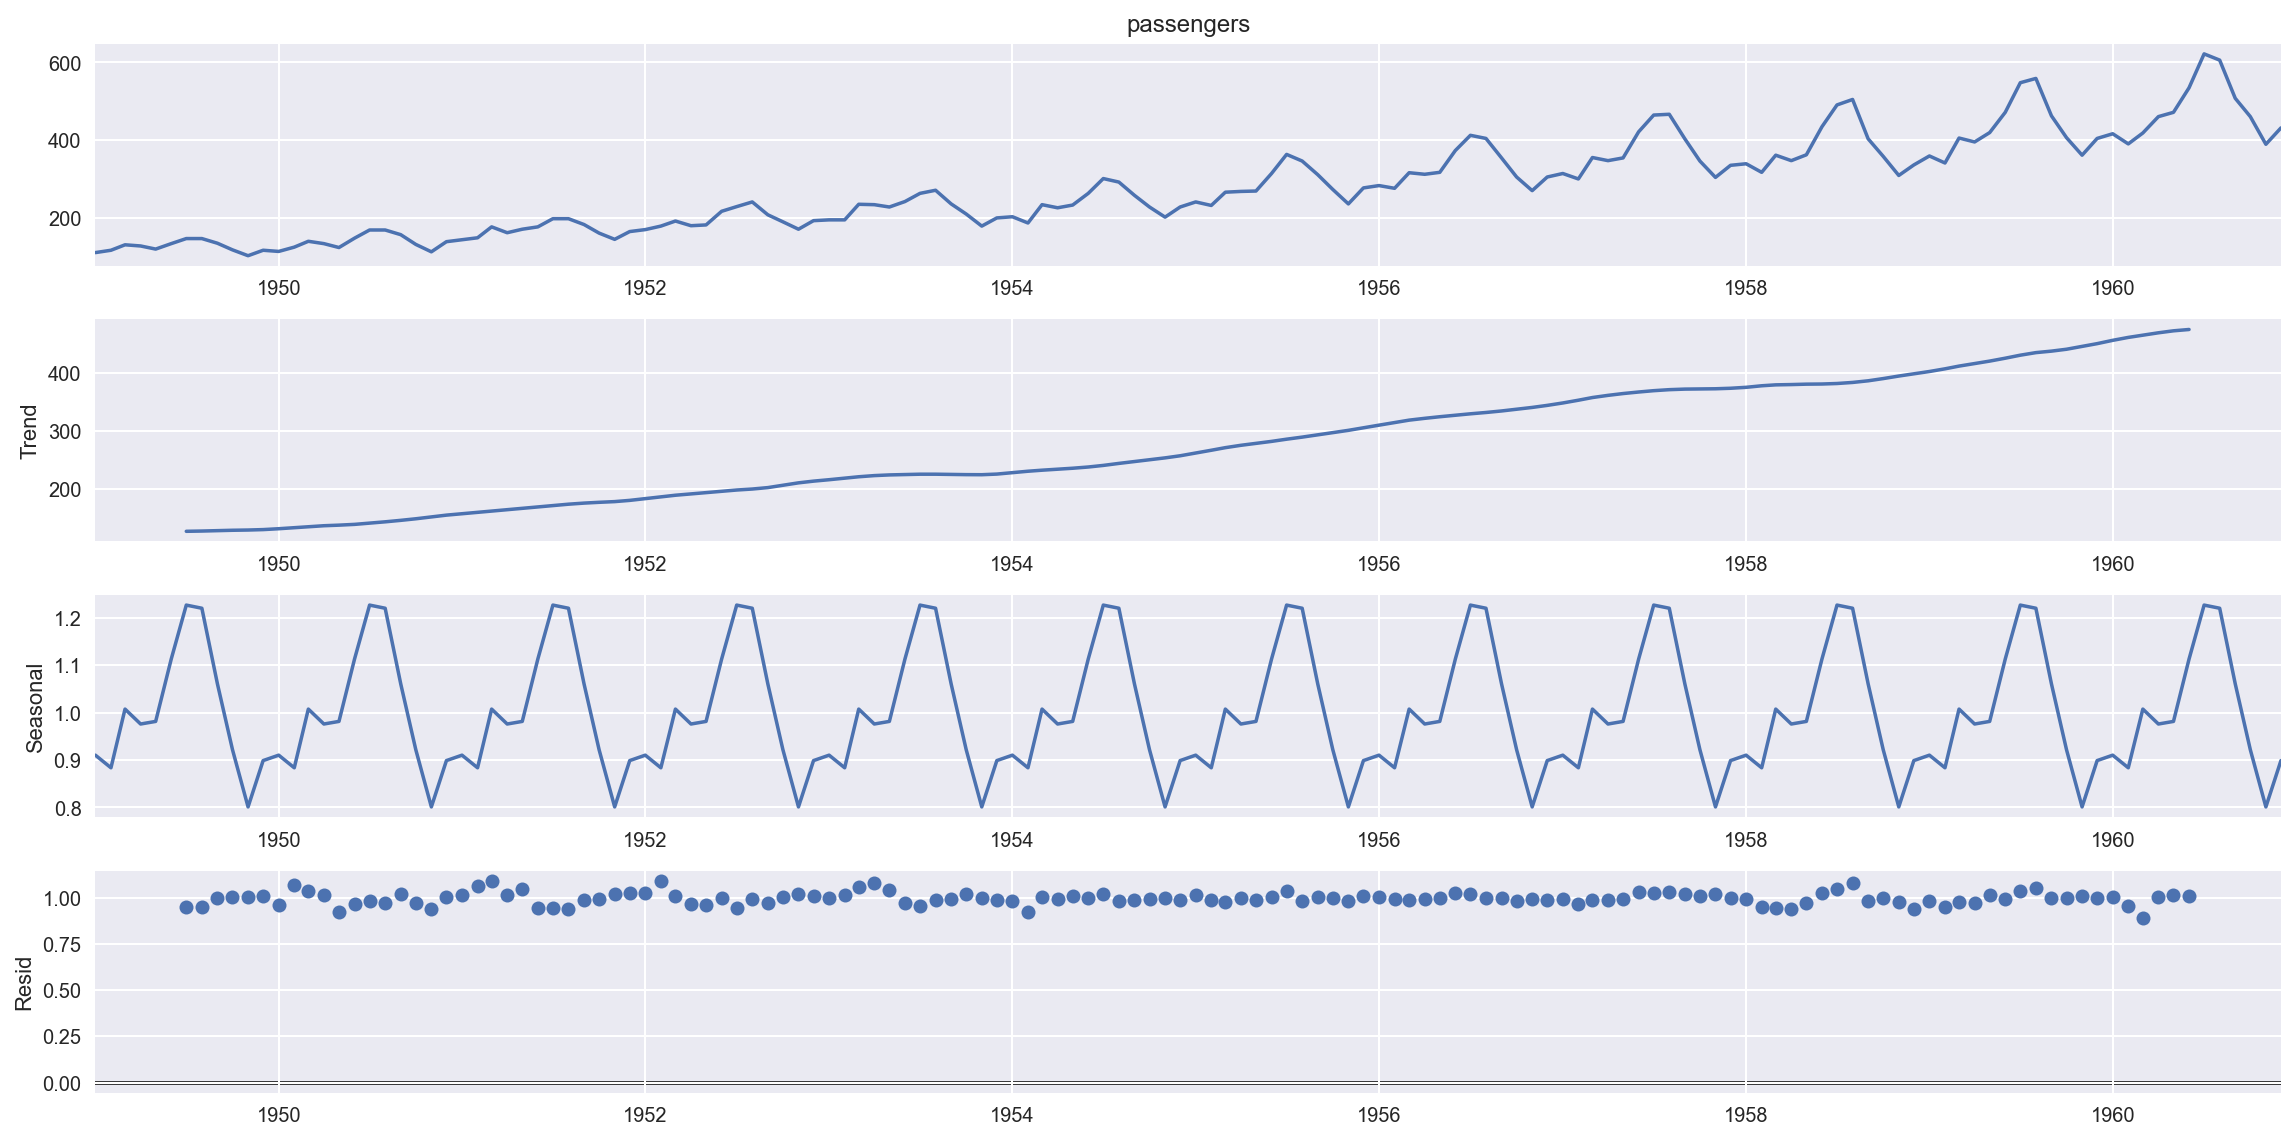

In [11]:
decomposition = seasonal_decompose(flights['passengers'], 
                                   model='multiplicative', 
                                   period=12)
decomposition.plot();

### Autocorrelation plots

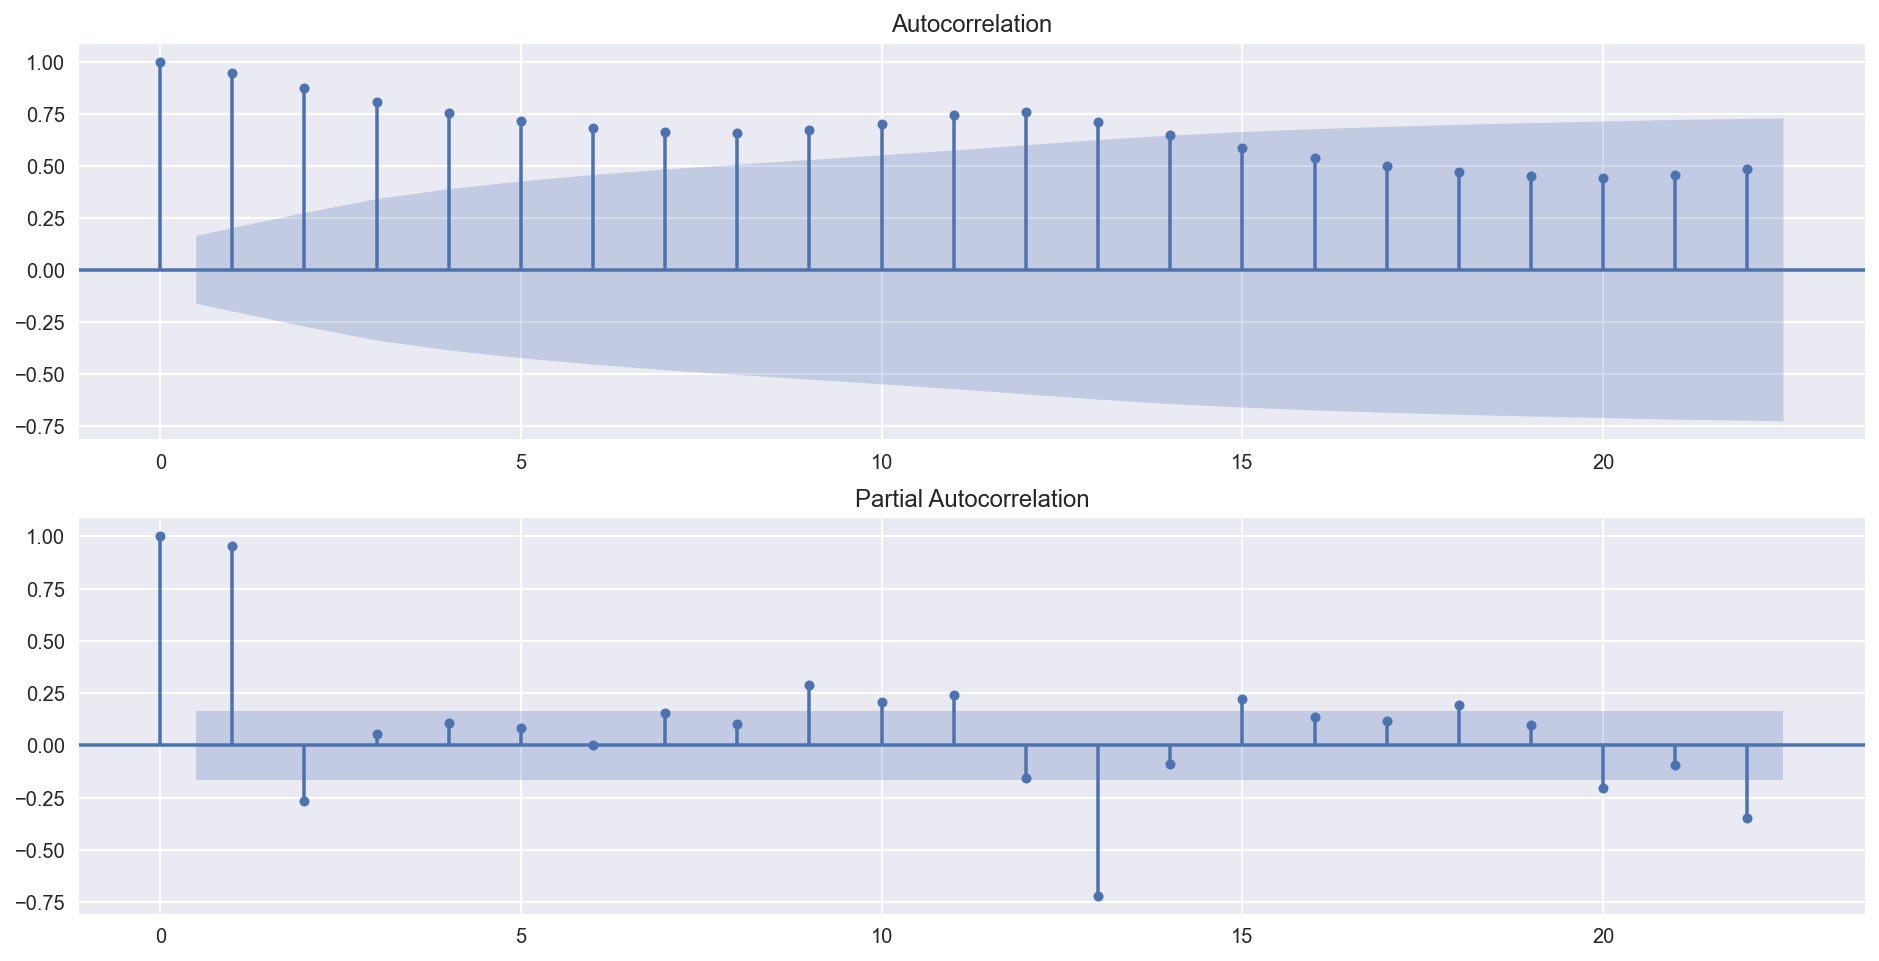

In [12]:
fig, ax = plt.subplots(2)
plot_acf(flights['passengers'], ax=ax[0])
plot_pacf(flights['passengers'], ax=ax[1]);